# Least Square Regression with scikit-learn

In this lab, you will learn about the following machine learning models:
*   Linear regression
*   Polyonomial regression
*   Ridge regression

You will learn to use the Python library [scikit-learn](https://scikit-learn.org) to fit synthetically generated data using each of these models.





To start, we need to import some modules that will be used in the tutorial.

In [1]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline

We are given the following training data:

In [2]:
x_tr = np.array(np.linspace(0,1,10))
y_tr = np.array([1.87,-1.34,2.77,2.87,3.43,3.87,3.30,4.13,8.18,7.67])

$x_{tr}$ is a vector of 10 input features, while $y_{tr}$ are the corresponding output features. We assume that the relation between $x_{tr}$ and $y_{tr}$ is linear and we decide to learn a linear regression model.
<font color="red">In reality, $x_{tr}$ and $y_{tr}$ were actually sampled from the function $y = e^{2x}$ in the interval [0,1].</font>

However, just like in a real-world scenario, <font color="red">we don't actually know the ground-truth function</font>: all we know are the data points we have observed, i.e., $x_{tr}$ and $y_{tr}$. What's more, the training data we have contains some noise, i.e., $y_{tr,i} = e^{2x_{tr,i}} + \epsilon(x_{tr,i})$, where $\epsilon(x_{tr,i})$ represents the noise that affected our $i$-th observation of $(x_{tr},y_{tr})$.

Let us define the ground-truth function and sample 200 points from the interval [0,2].

In [3]:
def f(x): return np.exp(2*x)
x = np.linspace(0., 2, 200)
y = f(x)

Now let's plot the ground-truth function (using the $x$ and $y$ we have just calculated) and our training data points.

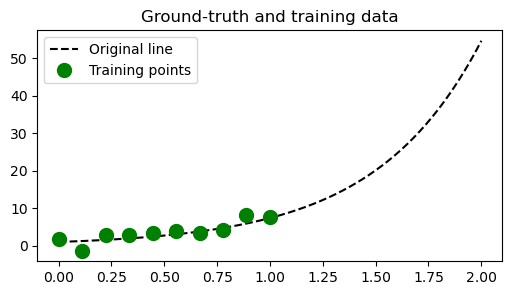

In [4]:
plt.figure(figsize=(6,3))
plt.plot(x,y,'--k')
plt.plot(x_tr,y_tr,'og',ms=10)
plt.legend(['Original line','Training points'])
plt.title('Ground-truth and training data')
plt.show()

As we can see, the training data (the green points) are (1) affected by noise (as they don't lie exactly on the original ine) and (2) they only provide a partial picture of the ground-truth functon. This is a classic real-world scenario where <b>we don't know</b> the ground-truth (e.g., the relation between a person's height and his/her weight), but we have access to (noisy) observations which give us some data to train our models on (e.g., measurements of the heigh and weight of a certain number of people).

As mentioned above, we decide to make the assumption that the training data can be explained using a linear function, i.e., we assume the outputs are a linear combination of the input features,
$$y_{tr,i} = w_1*x_{tr,i} + w_0$$

Given a set of training points $\lbrace x_{tr,i}, y_{tr,i}\rbrace$ we look for the values of the parameters $w_0$ and $w_1$ such that the sum of the squared differences between $y_{tr,i}$ and $w_1*x_{tr,i} + w_0$ is as small as possible, i.e.,

$$\arg\min_{w_0,w_1} \sum_{i} (y_{tr,i}-w_1*x_{tr,i} - w_0)^2$$

<b>Note</b>: in this formulation, <u>we are trying to minimize the vertical offsets</u>, not the perpendicular ones (see the figure below taken from [this](https://mathworld.wolfram.com/LeastSquaresFittingPerpendicularOffsets.html) website). Remember, our goal is to predict $y_{tr,i}$ from $x_{tr,i}$. The extent to which our prediction is wrong (i.e., the difference between our prediction and the correct one) is called "the error". In other words, we are trying to minimize the sum of the squared errors.

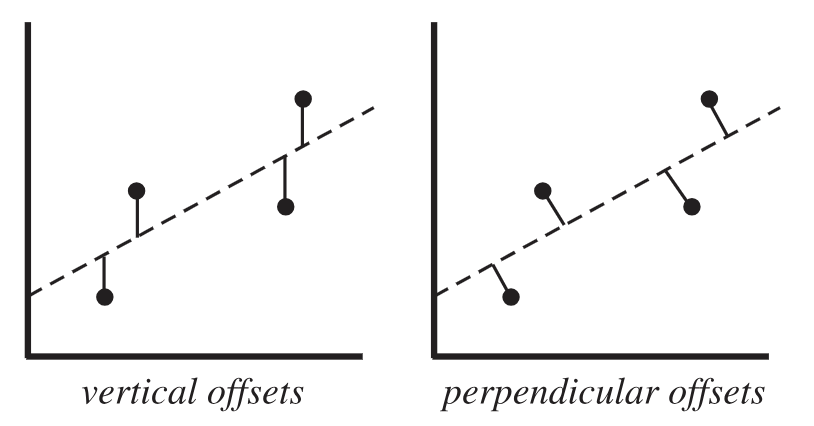

With scikit-learn, we can use [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to learn a linear regression model given a set of training points $x_{tr}$ and $y_{tr}$. Note that the function [fit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) of LinearRegression expects in input a matrix of shape $n_{samples} \times n_{features}$. For example, in our problem $x_{tr}$ corresponds to 10 samples of 1 feature each. We therefore need to transform $x_{tr}$ into a matrix with 10 rows and 1 column, which can be easily achieved by using [np.newaxis](https://stackoverflow.com/questions/29241056/how-do-i-use-np-newaxis).

In [5]:
# Linear regression model
lr = lm.LinearRegression()
# Transform the training data in the required format
X_tr = x_tr[:, np.newaxis]
# Train the model on the training data
lr.fit(X_tr, y_tr);

$lr$ is the linear model we learned. We can print its parameters ($w_1$, also called the <em>coefficient</em> of the line, and $w_0$, also called the <em>intercept</em> of the line) as follows.

In [6]:
print("w_1 =",lr.coef_)
print("w_0 =",lr.intercept_)

w_1 = [6.94745455]
w_0 = 0.20127272727272683


Given the model, we can use [predict](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict) to estimate the output value $y$ for any input $x$. For example, for $x=2$ we have:

In [7]:
lr.predict([[2]])

array([14.09618182])

Indeed, $w_1*2+w_0 \approx 6.947*2+0.201 \approx 14.096$.

Now let's plot the linear regression line we have just learned, together with the original line ($y=e^{2x}$) and the training points. Given $x$ (the 200 points we previously sampled in [0,2]), we use predict to compute the corresponding y-values and we use these to plot our linear model.

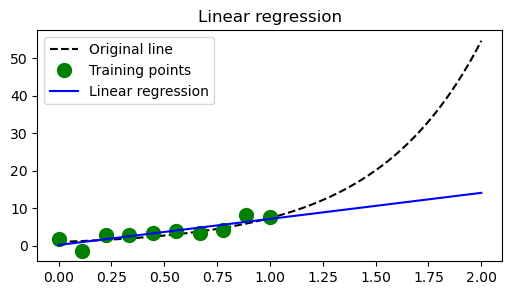

In [8]:
# Just like fit, predict needs the input data to be a n_sample*n_features matrix
X = x[:, np.newaxis]
y_lr = lr.predict(X)
# Let's plot everything
plt.figure(figsize=(6,3))
plt.plot(x,y,'--k')
plt.plot(x_tr,y_tr,'og', ms=10)
plt.plot(x,y_lr,'b')
plt.legend(['Original line','Training points','Linear regression'])
plt.title("Linear regression")
plt.show()

In the figure we can see:
*   the training set of points $x_{tr}$ and $y_{tr}$ (in <font color='green'>green</font>),
*   the original line [x,y] (in <font color='black'>back</font>),
*   the linear regression line [x,y_lr] (in <font color='blue'>blue</font>).

As we can see, the linear model we learned (the blue line) is a pretty poor approximation of the ground-truth function (black line) that generated our training data. If we want to use our model to predict values outside the [0,1] range, the model performs particularly poorly. For example, for $x = 1.75$, our model predicts the value $w_1*1.75 + w0 \approx 12.35931818$

In [9]:
print(lr.predict([[1.75]]))

[12.35931818]


However in reality it should be $e^{2*1.75} \approx 33.11$

In [10]:
print(np.exp(2*1.75))

33.11545195869231


In this lab you wil learn how to improve upon this model. You will learn how to fit a polynomial curve, instead of a straight line, and how to apply a simple regularization technique to ensure that the model doesn't grow too complex and overfits the training data.

## Task 1: Polynomial regression model</red>
In [polynomial regression](https://en.wikipedia.org/wiki/Polynomial_regression), we assume that our data can be explained using a $n$-th order polynomial, i.e.,
$$y_{tr,i} = \sum_{j=0}^n w_j*x_{tr,i}^j$$

For example, we can assume a 2nd order polynomial relation between inputs and output, i.e.,
$$y_{tr,i} = w_0 + w_1*x_{tr,i} + w_2*x_{tr,i}^2$$

Similarly to what we've done for the standard linear regression, given a set of training points $\lbrace x_{tr,i}, y_{tr,i}\rbrace$ we look for the values of the coefficients $w_j$ that minimize the sum of the squared differences between our model predictions and the target ouput values, i.e.,

$$\arg\min_{w_0,w_1,\cdots,w_n} \sum_{i} (y_{tr,i}-\sum_{j=0}^n w_j*x_{tr,i}^j)^2$$

Note that <font color='red'>the relation between the coefficients $w_j$ and $y_{tr,i}$ is still linear</font>. It's only the relation between the input features $x_{tr,i}$ and the ouputs that is now non-linear. In other words, this is still a linear regression problem! Therefore to learn the coefficients of the polynomial regression model we need to (1) transform the input features from $x_{tr,i}$ to $x_{tr,i}^0, x_{tr,i}^1, x_{tr,i}^2, \cdots, x_{tr,i}^n$ and (2) apply LinearRegression on the transformed data.

Now that you understand this, you are ready to complete this first task. First, using the [vander](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) function of numpy you need to compute the [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix) of the training input features $x_{tr,i}$. This read the links to understand what this means, however in a few words what this does is to compute the powers of $x_{tr,i}$ which you can then use as new input features for the linear regression.  

Once you have the Vandermonde matrix, use LinearRegression on the transformed features to learn TWO different models:

1.   the polynomial regression of degree 2 and
2.   the polynomial regression of degree 5

In [11]:
# Write your code here
x_vander_2 = np.vander(x_tr, 3, increasing=True)
x_vander_5 = np.vander(x_tr, 6, increasing=True)
print(x_vander_2)


[[1.         0.         0.        ]
 [1.         0.11111111 0.01234568]
 [1.         0.22222222 0.04938272]
 [1.         0.33333333 0.11111111]
 [1.         0.44444444 0.19753086]
 [1.         0.55555556 0.30864198]
 [1.         0.66666667 0.44444444]
 [1.         0.77777778 0.60493827]
 [1.         0.88888889 0.79012346]
 [1.         1.         1.        ]]


Plot in the same figure:
*   the original training points $x_{tr}$ and $y_{tr}$ (in <font color='green'>green</font>),
*   the original line [x,y] (in <font color='black'>back</font>),
*   the polynomial regression line of degree 2 [x,y_pr2] (in <font color='blue'>blue</font>).
*   the polynomial regression line of degree 5 [x,y_pr5] (in <font color='red'>red</font>).

Hint: you can adjust the limits of the y-axis to get a better idea of how well the red and blue lines approximate the original black line. Use
<em>plt.ylim([min_y,max_y])</em>to do this, where you can choose the values of <em>min_y</em> and <em>max_y</em>.

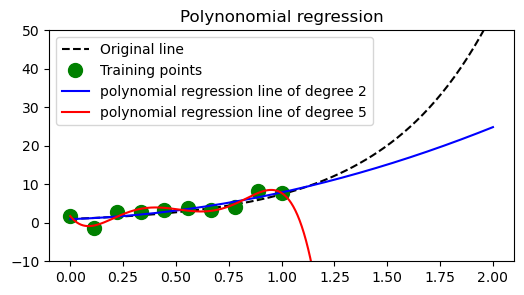

In [12]:
# Write your code here
lr_p2 = lm.LinearRegression()
lr_p2.fit(x_vander_2, y_tr);
X =  np.vander(x, 3, increasing=True)
y_pr2 = lr_p2.predict(X)
lr_p5 = lm.LinearRegression()
lr_p5.fit(x_vander_5, y_tr);
X =  np.vander(x, 6, increasing=True)
y_pr5 = lr_p5.predict(X)
# Let's plot everything
plt.figure(figsize=(6,3))
plt.plot(x,y,'--k')
plt.plot(x_tr,y_tr,'og', ms=10)
plt.plot(x,y_pr2,'b')
plt.plot(x,y_pr5,'r')
plt.legend(['Original line','Training points','polynomial regression line of degree 2','polynomial regression line of degree 5'])
plt.title("Polynonomial regression")
plt.ylim([-10,50])
plt.show()

<font color='red'>Copy and paste this figure in your **Section 1** of your report. Write down your observations about the result.</font>

## Task 2: Ridge regression model</red>
Let's improve on the results of Task 1. To do this, we need to make some modifications to our model. Ridge regression allows us to add a <b>regularization</b> term when learning our model. What this means is that we will now be trying to minimise not just the sum of the squared errors, but also another additional term. This additional term will lead us to learn a <b>simpler</b> model. A simpler model is less likely to overfit the training data.

The type of regularization used in ridge regression is called <b>l2 regularization</b>. This is achieved by adding a penalty term to the loss function, where the penalty term (another way of calling the regularization term) causes the total loss to be higher if the vector of parameters has a large l2 norm (also known as [Euclidean norm](https://en.wikipedia.org/wiki/Norm_(mathematics)#Euclidean_norm)). In other words, our model will try to do two things at the same time: (1) learn a polynomial curve that fits the training data well and (2) make sure that the coefficients of the polynomial (i.e., the parameters of the model) are kept relatively small (i.e., the l2 norm of the vector of parameters is small).

Our new minimization problem is as follows. given a set of training points $\lbrace x_{tr,i}, y_{tr,i}\rbrace$, we look for the values of the coefficients $w_j$ such that

$$\arg\min_{w_0,w_1,\cdots,w_n} \sum_{i} (y_{tr,i}-\sum_{j=0}^n w_j*x_{tr,i}^j)^2 + \alpha*\sum_{j=0}^n w_j^2$$

The part $\alpha*\sum_{j=0}^n w_j^2$ is the l2 penalty term. $\alpha$ is a non-negative number that controls the importance of the penalty term: if $\alpha=0$ the penalty term has no influence on the loss, whereas the larger the value of $\alpha$ is, the more weight will be given to the penalty.




Now that you understand what ridge regression does, let's use scikit-learn to apply it to our problem. Use again the vander function (see Task 1) to transform the training input features $x_{tr}$. Then use [RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) to learn 2 models:
1.   the ridge regression with polynomial of degree 2 and
2.   the ridge regression with polynomial of degree 5.

RidgeCV helps you to select the value of $\alpha$ which results in the best model. To do this, it tries different values of $\alpha$ from the range specified through the parameter <em>alphas</em>. For this task, I want you to set <em>alphas=np.arange(0.01,2.01,0.01)</em>.

In [13]:
# Write your code here
x_vander_2 = np.vander(x_tr, 3, increasing=True)
x_vander_5 = np.vander(x_tr, 6, increasing=True)
print(x_vander_2.shape, x_vander_5.shape, y_tr.shape)
ridge_cv=lm.RidgeCV(alphas=np.arange(0.01,2.01,0.01), store_cv_values=True)
Ridge_2 = ridge_cv.fit(x_vander_2, y_tr)
ridge_cv=lm.RidgeCV(alphas=np.arange(0.01,2.01,0.01), store_cv_values=True)
Ridge_5 = ridge_cv.fit(x_vander_5, y_tr)

(10, 3) (10, 6) (10,)


Plot in the same figure:
*   the original training points $x_{tr}$ and $y_{tr}$ (in <font color='green'>green</font>),
*   the original line [x,y] (in <font color='black'>back</font>),
*   the ridge regression line of degree 2 [x,y_pr2] (in <font color='blue'>blue</font>).
*   the ridge regression line of degree 5 [x,y_pr5] (in <font color='red'>red</font>).

(10,)
(10, 6) (10, 3)
3 6


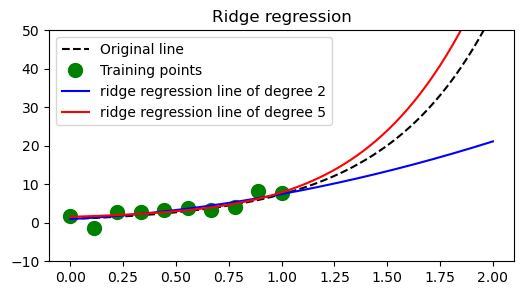

In [14]:
# Write your code here
print(x_tr.shape)
print(x_vander_5.shape, x_vander_2.shape)
print(Ridge_2.n_features_in_, Ridge_5.n_features_in_)
x_tr2 = np.vander(x, 3, increasing=True)
y_rr2 = Ridge_2.predict(x_tr2)
x_tr5 = np.vander(x, 6, increasing=True)
y_rr5 = Ridge_5.predict(x_tr5)
# Let's plot everything
plt.figure(figsize=(6,3))
plt.plot(x,y,'--k')
plt.plot(x_tr,y_tr,'og', ms=10)
plt.plot(x,y_rr2,'b')
plt.plot(x,y_rr5,'r')
plt.legend(['Original line','Training points','ridge regression line of degree 2','ridge regression line of degree 5'])
plt.title("Ridge regression")
plt.ylim([-10,50])
plt.show()

<font color='red'>Copy and paste this figure in your **Section 2** of your report. Write down your observations about this second experiment.</font>

Some suggestions to drive your observations:
*   Inspect the parameter **coef_** of the polynomial regression of degree 5 and of the ridge regression of degree 5. What do they tell you about the effect of the regularization?
*   Inspect the parameter **alpha_** of the ridge regression model. How does this change if we increase the degree of the polynomial? Why does this happen?